# Riconoscitore e risolutore di espressioni matematiche scritte a mano 3/3

![Logo Sapienza](logo.png "Logo Sapienza")

Frasca Emanuele - 1836098

# Caricamento delle librerie

Carichiamo le librerie che utilizzeremo nel progetto tra cui Numpy, Pandas, Matplotlib, OpenCV2, Sympy e Tensorflow.

In [70]:
print("Sto per caricare le librerie necessarie...")

print("Sto per caricare Numpy, Pandas e Matplotlib...")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

print("Sto per caricare os...")
import os
from os import listdir
from os.path import isfile, join

print("Sto per caricare re, math e sympy...")
import re
import math
from sympy import symbols, Eq, solve
from sympy.parsing.sympy_parser import parse_expr
from sympy import *

print("Sto per caricare PIL e OpenCV...")
import cv2
from PIL import Image

print("Sto per caricare Tensorflow e Keras...")
import keras
from keras import optimizers
from keras import backend as K
from keras.models import Model, Sequential, load_model
from keras.layers import *
from keras.layers import Input, Dense, Dropout, Flatten
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.utils.vis_utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
K.image_data_format()

import tkinter as tk
from PIL import Image, ImageGrab, ImageTk


print("Controllo se sono disponibili delle GPU per il training del modello:")
gpu = tf.config.list_physical_devices('GPU')
if len(gpu) == 0: print("Non sono disponibili GPU") 
else: print(gpu)


print("Fatto")

Sto per caricare le librerie necessarie...
Sto per caricare Numpy, Pandas e Matplotlib...
Sto per caricare os...
Sto per caricare re, math e sympy...
Sto per caricare PIL e OpenCV...
Sto per caricare Tensorflow e Keras...
Controllo se sono disponibili delle GPU per il training del modello:
Non sono disponibili GPU
Fatto


## Inserimento espressione

Utilizziamo Tkinker per permettere l'inserimento manuale di un'espressione matematica utilizzando un mouse/tavoletta grafica

In [2]:
class App:
    def __init__(self, master, width, height):
        self.master = master
        self.width = width
        self.height = height

        # Creazione del canvas
        self.canvas = tk.Canvas(self.master, width=self.width, height=self.height, bg="white")
        self.canvas.grid(row=0, column=0, columnspan=2)

        # Associazione degli eventi del mouse
        self.canvas.bind("<Button-1>", self.on_button_press)
        self.canvas.bind("<B1-Motion>", self.on_move_press)

        # Creazione dei pulsanti
        self.clear_button = tk.Button(self.master, text="Clear", command=self.clear_canvas)
        self.clear_button.grid(row=1, column=0, sticky="ew")
        self.ok_button = tk.Button(self.master, text="OK", command=self.save_canvas)
        self.ok_button.grid(row=1, column=1, sticky="ew")

        # Variabili per tenere traccia del disegno
        self.start_x = None
        self.start_y = None
        self.pen_color = "black"
        self.pen_size = 5

    def on_button_press(self, event):
        self.start_x = event.x
        self.start_y = event.y

    def on_move_press(self, event):
        end_x = event.x
        end_y = event.y
        self.canvas.create_line(self.start_x, self.start_y, end_x, end_y, fill=self.pen_color, width=self.pen_size, capstyle=tk.ROUND, smooth=True)
        self.start_x = end_x
        self.start_y = end_y

    def clear_canvas(self):
        self.canvas.delete("all")

    def save_canvas(self):
        # Prende una screenshot del canvas e la salva nella variabile "out_image"
        x = self.master.winfo_rootx() + self.canvas.winfo_x()
        y = self.master.winfo_rooty() + self.canvas.winfo_y()
        x1 = x + self.canvas.winfo_width()
        y1 = y + self.canvas.winfo_height()
        image = ImageGrab.grab((x, y, x1, y1))
        image.save("espressioni/espressione_canvas.png")
        root.destroy()



if __name__ == '__main__':
    root = tk.Tk()
    root.title("Inserimento espressione")
    app = App(root, 1400, 500)
    root.mainloop()


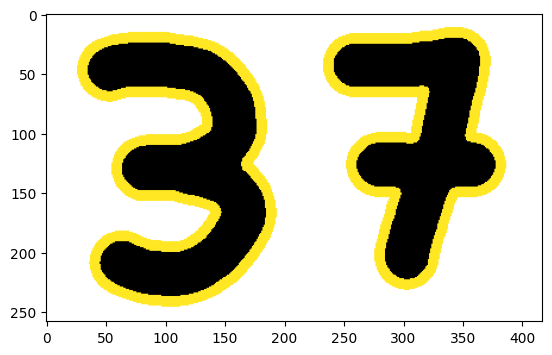

In [84]:
img = cv2.imread("espressioni/bordi.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Disegna i contorni in rosso sull'immagine
cv2.drawContours(img, contours, -1, (256,231,36), 7)

plt.imshow(img)

# Mostra l'immagine
#cv2.imshow("Bordi", img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

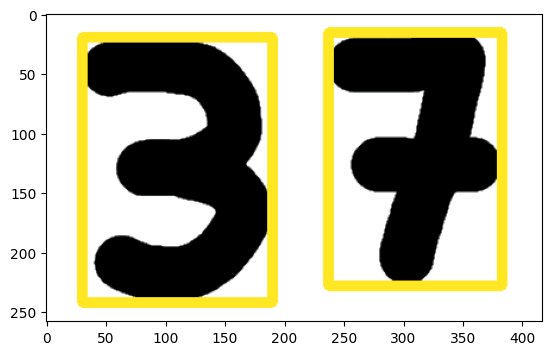

In [85]:
img = cv2.imread("espressioni/bordi.png")

for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(img, (x, y), (x + w, y + h), (256,231,36), 7)

plt.imshow(img)


# Riconoscimento

Carichiamo il modello allenato in precedenza dal disco.

In [25]:
model = load_model("modello.h5")

Carico l'espressione da riconoscere dal disco e la stampo a schermo.

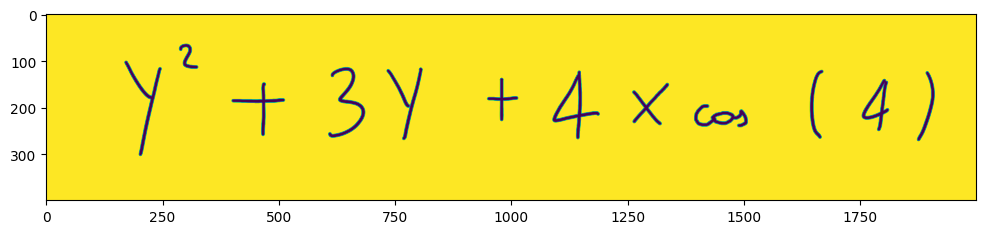

In [72]:
espressione = 'espressioni/nuove/22.png'

img = cv2.imread(espressione, cv2.IMREAD_GRAYSCALE)
plt.figure(figsize = (12,12))
plt.imshow(img)

Per mezzo di OpenCV cerco i singoli elementi che compongono l'espressione, poi li stampo a video.

In [38]:
labels = [1,2,7]
Y = to_categorical(labels, num_classes = 9)
print(Y)

[[0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]]


In [73]:
import cv2
import numpy as np

# Carica l'immagine binaria
img = cv2.imread('espressioni/nuove/33.png', 0)

# Trova le componenti connesse e le statistiche
n_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(img)

# Per ogni componente connessa (esclusa quella dello sfondo)
for i in range(1, n_labels):

    # Crea un'immagine vuota dello stesso formato dell'immagine originale
    component_img = np.zeros_like(img)

    # Imposta i pixel corrispondenti alla componente connessa su 255
    component_img[labels == i] = 255

    cv2.imshow('Largest component', component_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

    # Salva l'immagine della componente connessa
    cv2.imwrite('component_' + str(i) + '.png', component_img)


In [74]:
import cv2

# carica l'immagine
img = cv2.imread("espressioni/nuove/33.png")

# converte l'immagine in scala di grigi
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# applica una soglia all'immagine
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# trova le componenti connesse
connectivity = 8
output = cv2.connectedComponentsWithStats(thresh, connectivity, cv2.CV_32S)
labels = output[1]

for etichetta in labels:
    print(etichetta)


print(labels)
stats = output[2]

# identifica l'etichetta della componente connessa più grande
max_label = 1
max_area = stats[1, cv2.CC_STAT_AREA]
for label in range(2, output[0]):
    area = stats[label, cv2.CC_STAT_AREA]
    if area > max_area:
        max_label = label
        max_area = area

# crea un'immagine vuota e copia solo la componente connessa più grande
mask = cv2.inRange(labels, max_label, max_label)
largest_component = cv2.bitwise_and(img, img, mask=mask)

# visualizza l'immagine con la componente connessa più grande
cv2.imshow('Largest component', largest_component)
cv2.waitKey(0)
cv2.destroyAllWindows()


[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]
[1 1 1 ...

1758.0
forse è un esponente 1
[1]


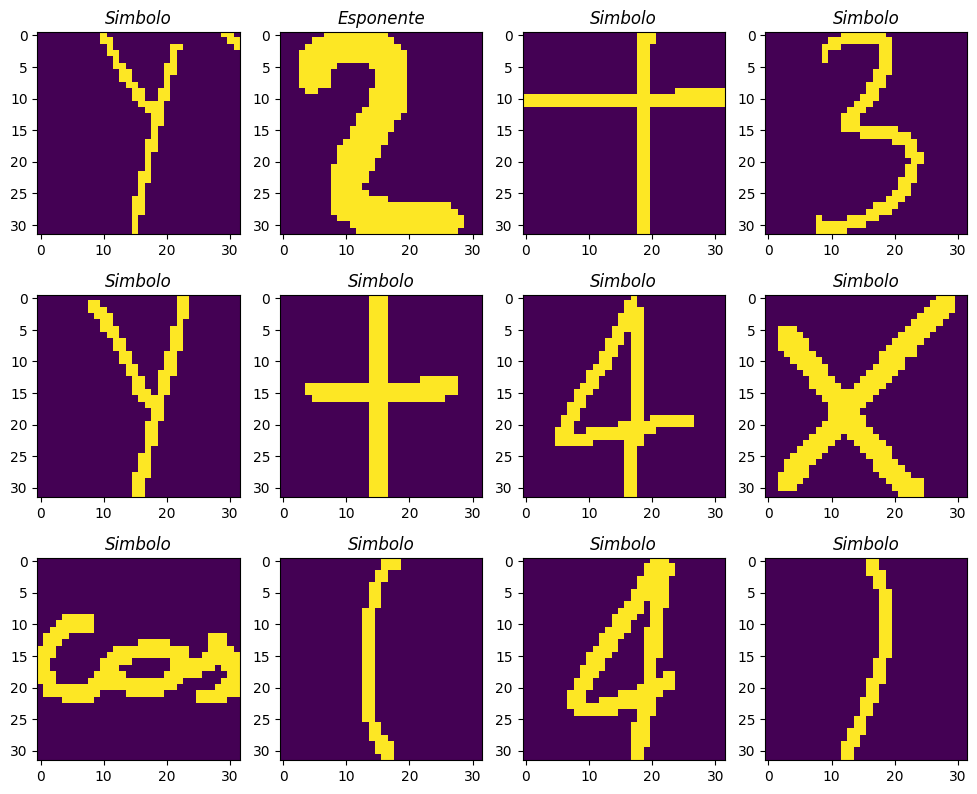

In [77]:
import cv2, math

# Leggi l'immagine e convertila in scala di grigi
img = cv2.imread("espressioni/nuove/22.png", cv2.IMREAD_GRAYSCALE)

img=~img
# Applica la segmentazione a soglia per ottenere una maschera binaria
ret, thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)



# Rimuovi i pixel isolati tramite l'operazione di opening
#kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
#opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

# Trova i contorni degli elementi nell'immagine
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contours=sorted(contours, key=lambda ctr: cv2.boundingRect(ctr)[0])

area_base = cv2.contourArea(contours[0])
print(area_base)

# Disegna i bordi individuati nell'immagine originale e salva l'elenco dei bordi in un file
train_data = []
esponenti = []
for i, cnt in enumerate(contours):
    # Estrai la porzione di immagine delimitata dal rettangolo del contorno
    
    
    x, y, w, h = cv2.boundingRect(cnt)

    area = cv2.contourArea(cnt)
    # Se non mi trovo sul primo elemento
    if i !=0:
        xo, yo, wo, ho = cv2.boundingRect(contours[i-1])
        #if y+h > yo+ho and y+h:
        if y<yo and h<ho and w<wo:
            area_esponente = cv2.contourArea(contours[i])
            area_numero = cv2.contourArea(contours[i-1])
            if (area_esponente<1/2*area_numero):
                esponenti.append(i)
                print("forse è un esponente",i)
                print(esponenti)


    
    square_size = max(w, h)
    x1 = x + w//2 - square_size//2
    y1 = y + h//2 - square_size//2
    cropped = img[y1:y1+square_size, x1:x1+square_size]

    #cropped = img[y:y+h, x:x+w]

    # Aggiungi l'immagine alla lista
    cropped = cv2.resize(cropped,(32,32))
    _,cropped=cv2.threshold(cropped,0,255,cv2.THRESH_BINARY)


    cropped=np.reshape(cropped,(32,32,1))



    train_data.append(cropped)
    # Disegna il rettangolo sulle immagini originali
    #cv2.rectangle(img, (x1, y1), (x1+square_size, y1+square_size), (0, 0, 255), 2)

# Salva le immagini originali con i bordi disegnati
cv2.imwrite("borders.jpg", img)

# Utilizza le immagini estratte per le elaborazioni successive
for img in train_data:

    break


rows = int(math.sqrt(len(train_data))) + 1
cols = rows
img_count = 0

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(12,12))

plt.subplots_adjust(top=0.95)


for i in range(rows):
    for j in range(cols):  
        if(i*4+j in esponenti):
            axes[i, j].imshow(train_data[img_count])
            axes[i, j].set_title('Esponente', fontstyle='italic')
            img_count+=1
        elif img_count < len(train_data):
            axes[i, j].imshow(train_data[img_count])
            axes[i, j].set_title('Simbolo', fontstyle='italic')
            
            #axes.set_title(label, fontfamily='serif', loc='left', fontsize='medium')
            img_count+=1
        else:
            fig.delaxes(axes[i,j])


#fig.delaxes(axes[3,3])



Ho trovato: 13 contorni
397
273
476
418
334
232
354
326
222
316
249
308
478


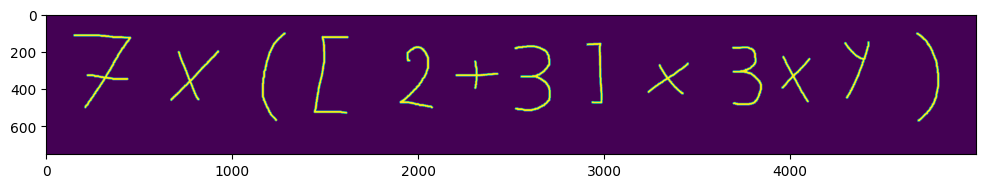

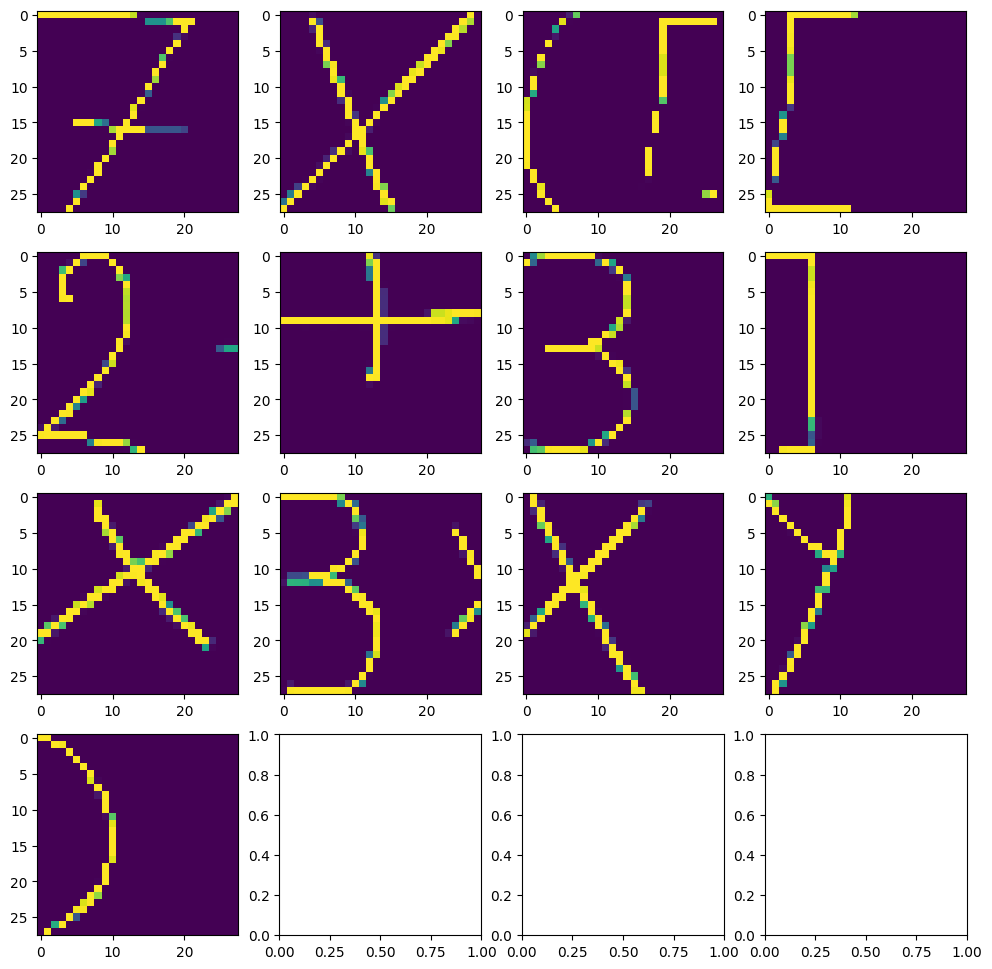

In [14]:
import matplotlib

img = cv2.imread(espressione,cv2.IMREAD_GRAYSCALE)

if img is not None:
    img=~img
    _,thresh=cv2.threshold(img,15,255,cv2.THRESH_BINARY)
    ctrs,_=cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])

    plt.figure(figsize = (12,12))
    plt.imshow(thresh)

    w=int(28)
    h=int(28)
    train_data=[]
    print("Ho trovato: " + str(len(cnt)) + " contorni")

    rects=[]
    for c in cnt :
        x,y,w,h= cv2.boundingRect(c)
        ss = max(w, h)
        print(ss)
        im_resize = img[y:y+ss,x:x+ss]
        im_resize = cv2.resize(im_resize,(28,28))
      
        train_data.append(im_resize)
    

rows = int(math.sqrt(len(train_data))) + 1
cols = rows
img_count = 0

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(12,12))

for i in range(rows):
    for j in range(cols):        
        if img_count < len(train_data):
            axes[i, j].imshow(train_data[img_count])
            img_count+=1


Effettuiamo delle predizioni su ogni singolo elemento che abbiamo individuato nella fase precedente grazie ed OpenCV utilizzando il modello creato in precedenza.

In [12]:
import os
diz = {}
folders = [folder for folder in os.listdir("training")]
for folder,i in enumerate(folders):
    diz[i] = folder
labels = [key for key in diz]
print(labels)
print(diz)

['!', '(', ')', '+', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'cos', 'div', 'eq', 'mul', 'sin', 'y', 'z', '[', ']']
{'!': 0, '(': 1, ')': 2, '+': 3, '-': 4, '0': 5, '1': 6, '2': 7, '3': 8, '4': 9, '5': 10, '6': 11, '7': 12, '8': 13, '9': 14, 'cos': 15, 'div': 16, 'eq': 17, 'mul': 18, 'sin': 19, 'y': 20, 'z': 21, '[': 22, ']': 23}


In [ ]:
for elem, num in diz.items():
        if num == prediction[0]:
            expression = expression + elem

In [21]:
from sklearn.preprocessing import MinMaxScaler


train_data[0]=np.array(train_data[0])


train_data[0]=train_data[0].reshape(1,32,32,1)



probabilities=model.predict(train_data[0])
prediction = np.argmax(probabilities, axis=-1)
print(probabilities)




# Normalizza il vettore a

a_troncato = np.around(probabilities[0], decimals=-3)


print(a_troncato)



print("Il valore cercato è " + str(prediction) + " con una probabilità del: " + str(max(probabilities[0])*100) + " %")


1/1 [==============================] - 0s 36ms/step
[[7.07965674e-12 8.76897860e-12 1.38433889e-10 1.00000000e+00
  1.72526398e-14 3.12225523e-11 1.41907102e-11 1.28810809e-10
  2.09434770e-12 2.22857910e-09 5.45558548e-15 9.97935086e-15
  1.88332164e-16 3.19324130e-13 2.77461675e-13 6.66471218e-13
  1.23468409e-08 1.19233765e-13 7.03576466e-14 7.61697156e-14
  6.18257819e-15 1.35813805e-14 2.69026663e-13 2.17894813e-09]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Il valore cercato è [3] con una probabilità del: 100.0 %


1/1 [==============================] - 0s 56ms/step
Il valore cercato è [15] con una probabilità del: 99.97267127037048 %
1/1 [==============================] - 0s 50ms/step
Il valore cercato è [2] con una probabilità del: 99.94714856147766 %
1/1 [==============================] - 0s 50ms/step
Il valore cercato è [10] con una probabilità del: 99.99982118606567 %
1/1 [==============================] - 0s 50ms/step
Il valore cercato è [3] con una probabilità del: 100.0 %
1/1 [==============================] - 0s 64ms/step
Il valore cercato è [15] con una probabilità del: 99.99799728393555 %
1/1 [==============================] - 0s 72ms/step
Il valore cercato è [10] con una probabilità del: 99.99667406082153 %
1/1 [==============================] - 0s 64ms/step
Il valore cercato è [4] con una probabilità del: 99.28327798843384 %
1/1 [==============================] - 0s 96ms/step
Il valore cercato è [12] con una probabilità del: 100.0 %
1/1 [==============================] - 0s 40ms/step

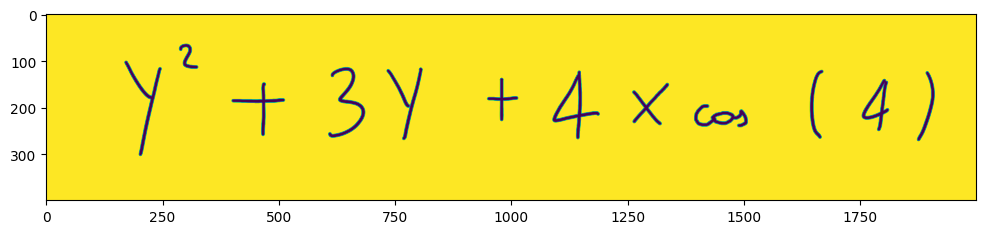

In [82]:
expression=''
prob_tot = 0

for i in range(len(train_data)):
    
    train_data[i]=np.array(train_data[i])
    train_data[i]=train_data[i].reshape(1,32,32,1)
    probabilities=model.predict(train_data[i])
    
    prediction = np.argmax(probabilities, axis=-1)

    prob_tot = prob_tot + max(probabilities[0])*100

    print("Il valore cercato è " + str(prediction) + " con una probabilità del: " + str(max(probabilities[0])*100) + " %")
    

    if i in esponenti and i != 0:
        expression = expression + "**"
        
    for j in range(10) :
        if prediction[0] == j :
            expression = expression + str(j)
    
    if prediction[0] == 10 :
        expression = expression + "+"
    if prediction[0] == 11 :
        expression = expression + "-"
    if prediction[0] == 12 :
        expression = expression + "*"
    if prediction[0] == 13 :
        expression = expression + "/"
    if prediction[0] == 14 :
        expression = expression + "="
    if prediction[0] == 15 :
        expression = expression + "y"
    if prediction[0] == 16 :
        expression = expression + "z"      
    if prediction[0] == 17 :
        expression = expression + "("
    if prediction[0] == 18 :
        expression = expression + ")"
    if prediction[0] == 19 :
        expression = expression + "!"
    if prediction[0] == 20 :
        expression = expression + "sin"
    if prediction[0] == 21 :
        expression = expression + "cos"
    if prediction[0] == 22 :
        expression = expression + "["
    if prediction[0] == 23 :
        expression = expression + "]"


img = cv2.imread(espressione, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize = (12,12))
plt.imshow(img)
print()
print()
print("L'espressione cercata è", expression, "con una probabilità del ", prob_tot/len(train_data), "%")

# Parsing e calcolo

Effettuiamo il parsing ed il calcolo dell'equazione associata all'espressione data grazie alla libreria Sympy

In [104]:
from sympy.parsing.sympy_parser import standard_transformations, implicit_multiplication_application

print("Imposto, a partire dall'espressione data una equazione = 0:")

print(str(expression) + " = 0")
print()

if "[" in expression or "]" in expression:
    equation = expression.replace("[", "(" )
    equation = expression.replace("]", ")" )


if "y" in expression:
    y = symbols('y')

    transformations = (standard_transformations + (implicit_multiplication_application,))

    parsed =parse_expr(expression, transformations=transformations)

    #eparsing = sympify(str(parsed))
    #eparsing = eparsing.evalf()
    #print(eparsing)
    #print()

    soluzione = solve(parsed, y)

    print("Stampo la soluzione dell'equazione:")
    print(soluzione)
else:
    parsed = parse_expr(espressione)
    eparsing = sympify(str(parsed))
    eparsing = eparsing.evalf()
    soluzione = eparsing.evalf()
    print()
    print("Stampo la soluzione dell'espressione:")
    print(soluzione)
    



Imposto, a partire dall'espressione data una equazione = 0:
y**2+3y+4*cos(4) = 0

Stampo la soluzione dell'equazione:
[-3/2 + sqrt(9 - 16*cos(4))/2, -sqrt(9 - 16*cos(4))/2 - 3/2]


In [28]:
import cv2
import numpy as np
from sklearn.cluster import DBSCAN


espressione = 'espressioni/1.png'



# Leggi l'immagine e convertila in scala di grigi
img = cv2.imread(espressione)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Applica il filtro di Canny per individuare i bordi forti
edges = cv2.Canny(gray, 100, 200)

# Applica la trasformata di Hough per individuare le linee dritte nell'immagine
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, minLineLength=50, maxLineGap=5)

# Utilizza l'algoritmo di raggruppamento DBSCAN per identificare i gruppi di linee correlate
X = np.array(lines)[:,0,:]
clustering = DBSCAN(eps=20, min_samples=2).fit(X)

# Disegna i bordi individuati nell'immagine originale e salva l'elenco dei bordi in un file
with open("borders.txt", "w") as f:
    for i, line in enumerate(lines):
        x1, y1, x2, y2 = line[0]
        if clustering.labels_[i] != -1:
            cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)
            f.write(f"Border {i+1}: ({x1}, {y1}) - ({x2}, {y2})\n")
cv2.imwrite("borders.jpg", img)


True

In [41]:
import cv2

# Leggi l'immagine e convertila in scala di grigi
img = cv2.imread("espressioni/1.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Applica la segmentazione a soglia per ottenere una maschera binaria
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Rimuovi i pixel isolati tramite l'operazione di opening
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

# Trova i contorni degli elementi nell'immagine
contours, hierarchy = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Disegna i bordi individuati nell'immagine originale e salva l'elenco dei bordi in un file
with open("borders.txt", "w") as f:
    for i, cnt in enumerate(contours):
        # Calcola le dimensioni del rettangolo e la dimensione massima tra larghezza e altezza
        x, y, w, h = cv2.boundingRect(cnt)
        max_dim = max(w, h)
        # Calcola le coordinate del vertice in alto a sinistra del rettangolo quadrato
        x1 = x + w//2 - max_dim//2
        y1 = y + h//2 - max_dim//2
        # Disegna il rettangolo quadrato
        cv2.rectangle(img, (x1, y1), (x1+max_dim, y1+max_dim), (0, 0, 255), 2)

cv2.imwrite("borders.jpg", img)


True